In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("text.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# Categories:

- sadness (0)
- joy (1) 
- love (2) 
- anger (3)
- fear (4)
-  surprise (5). 

In [3]:
labels_dict = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

df["label_names"] = df["label"].map(labels_dict)
df.head()

,text,label,label_names
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


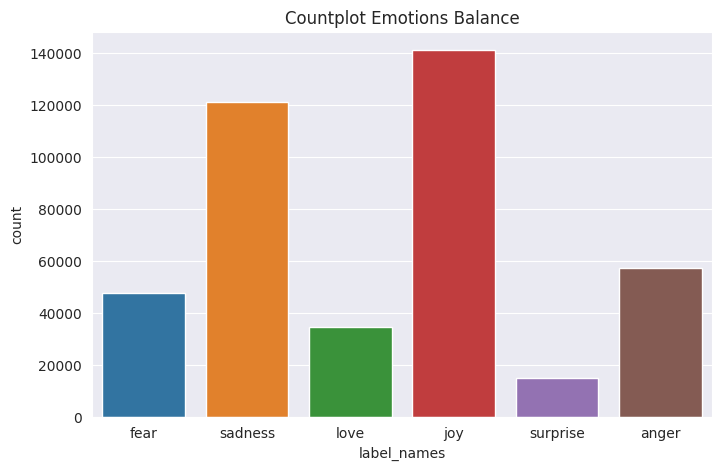

In [4]:
# See the Balance between the Labels

plt.figure(figsize=(8, 5))
sns.countplot(x="label_names", data=df, hue="label_names")
plt.title("Countplot Emotions Balance")
plt.show()

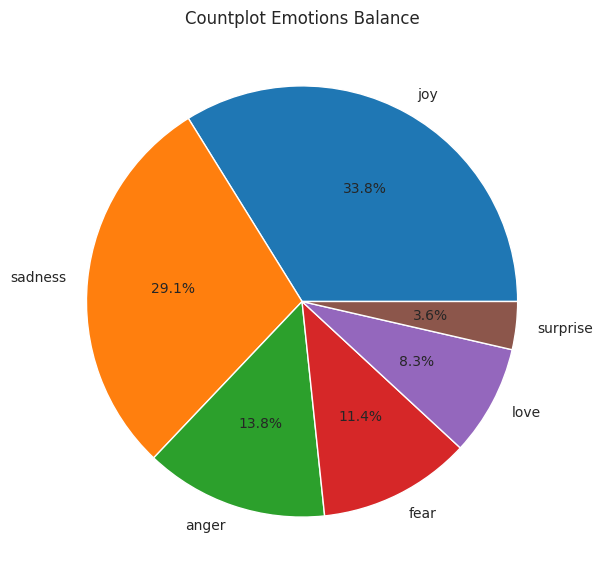

In [5]:
label_counts = df["label_names"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(label_counts.values, labels=label_counts.index, autopct="%1.1f%%")
plt.title("Countplot Emotions Balance")
plt.show()

In [6]:
# see some examples

for i in range(6):
    emotion = df.query(f"label == {i}")
    text = emotion["text"].values[42]
    label = emotion["label_names"].values[42]
    print(f"Label: {label} \n\nText: {text}\n\n\n")

Label: sadness 

Text: i feel pretty pathetic that i have been in therapy for almost three decades and i m still crazy



Label: joy 

Text: i am a very different person now much more confident and i feel proud



Label: love 

Text: i feel in me sparkle sweet passion aretha love all the hurt away jump to it the jamaica world music festival greatest hits whos zooming who aretha i knew you were waiting for me feat



Label: anger 

Text: i feel angry i feel angry see me frown see me frown



Label: fear 

Text: im feeling frightened and i dont know how to handle this



Label: surprise 

Text: i started feeling funny that whole week by the end of the week at work i was like





In [4]:
# How much Words we have each Text?

df["text_len"] = [len(text.split()) for text in df["text"].values]
df = df.sort_values(by="text_len", ascending=False)
df.head(20)

,text,label,label_names,text_len
348392,a few days back i was waiting for the bus at t...,3,anger,178
291479,two years back someone invited me to be the tu...,3,anger,110
97990,i have been thinking of changing my major for ...,0,sadness,101
22827,my living and working conditions at home were ...,0,sadness,100
38708,when i got into a bus i found that my wallet h...,3,anger,100
333596,i had a dream i had a very close friend who ha...,1,joy,94
250428,i worked with several classmates on a project ...,3,anger,80
159085,i was camping in an old broken hut which had n...,4,fear,79
56856,last semester when i dated a girl whom ive kno...,3,anger,78
162699,i was a prefect at secondary school on the spo...,3,anger,77


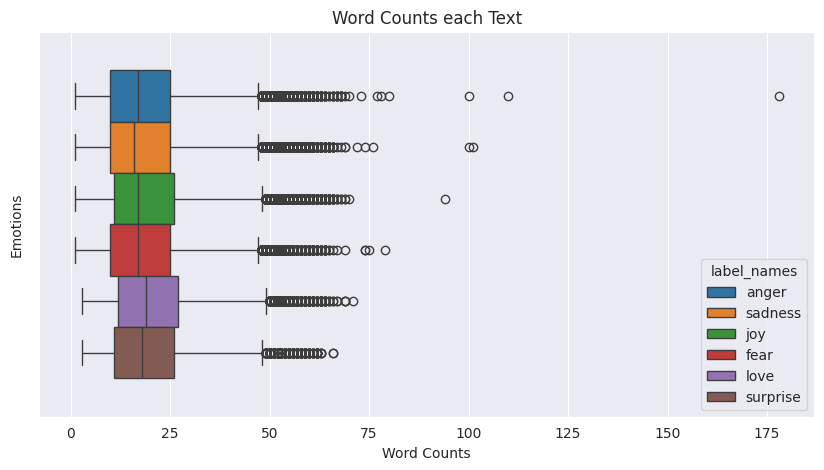

In [8]:
# See the Balance Text Len for each Label

plt.figure(figsize=(10, 5))
sns.boxplot(x="text_len", hue="label_names", data=df)
plt.title("Word Counts each Text")
plt.xlabel("Word Counts")
plt.ylabel("Emotions")
plt.show()

# We dont delete "Outliers", but keep in mind.

In [5]:
# shuffle the DataFrame

df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop=True)
df.head()

,text,label,label_names,text_len
0,i squeeze it tightly and feel it start to grow...,4,fear,36
1,i was still feeling puke y and was getting cra...,3,anger,22
2,i still feel vaguely surprised me when i drive...,5,surprise,22
3,i have started with a good foundation and feel...,1,joy,25
4,i do allow myself to feel oh those are terribl...,0,sadness,11


# the Text seemed pretty cleared, we give a try.

In [6]:
from sklearn.model_selection import train_test_split

# Feature and Targets
X = df["text"]
y = df["label"]

# Split Data in Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

len(X_train), len(y_train), len(X_test), len(y_test)

(312606, 312606, 104203, 104203)

In [11]:
# create mini Training Set

X_train_mini = X_train[:15000]
y_train_mini = y_train[:15000]

y_train_mini.value_counts()

label
1    5045
0    4336
3    2048
4    1717
2    1298
5     556
Name: count, dtype: int64

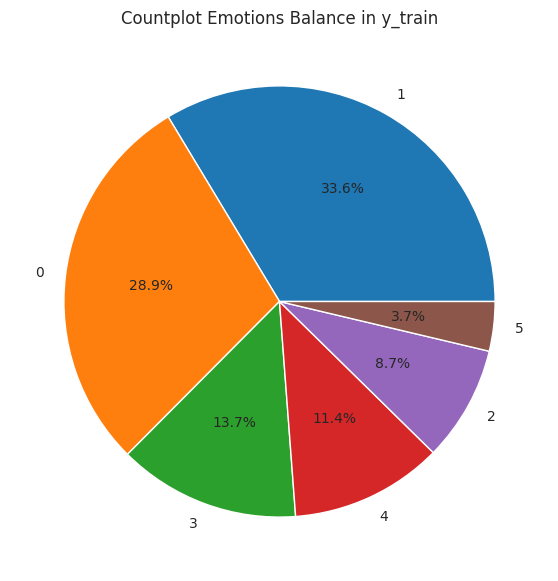

In [12]:
y_train_counts = y_train_mini.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(y_train_counts.values, labels=y_train_counts.index, autopct="%1.1f%%")
plt.title("Countplot Emotions Balance in y_train")
plt.show()

# Pretty unbalanced, we'll use StratifiedKFold for finding a good Baseline Model.

Pipeline 1: CountVectorizer | MultinomialNB, accuracy: 0.7284
Pipeline 2: TfidfVectorizer | MultinomialNB, accuracy: 0.6209
Pipeline 3: CountVectorizer | SVC, accuracy: 0.7519
Pipeline 4: TfidfVectorizer | SVC, accuracy: 0.8209
Pipeline 5: CountVectorizer | RandomForestClassifier, accuracy: 0.8633
Pipeline 6: TfidfVectorizer | RandomForestClassifier, accuracy: 0.8495
Pipeline 7: CountVectorizer | GradientBoostingClassifier, accuracy: 0.8359
Pipeline 8: TfidfVectorizer | GradientBoostingClassifier, accuracy: 0.8299
Pipeline 9: CountVectorizer | PassiveAggressiveClassifier, accuracy: 0.8571
Pipeline 10: TfidfVectorizer | PassiveAggressiveClassifier, accuracy: 0.8531
Pipeline 11: CountVectorizer | DecisionTreeClassifier, accuracy: 0.8517
Pipeline 12: TfidfVectorizer | DecisionTreeClassifier, accuracy: 0.8166
Pipeline 13: CountVectorizer | RidgeClassifier, accuracy: 0.8871
Pipeline 14: TfidfVectorizer | RidgeClassifier, accuracy: 0.8792
Pipeline 15: CountVectorizer | KNeighborsClassifier, 

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline 21: CountVectorizer | LinearSVC, accuracy: 0.8759
Pipeline 22: TfidfVectorizer | LinearSVC, accuracy: 0.8821
Pipeline 23: CountVectorizer | Perceptron, accuracy: 0.8531
Pipeline 24: TfidfVectorizer | Perceptron, accuracy: 0.8421


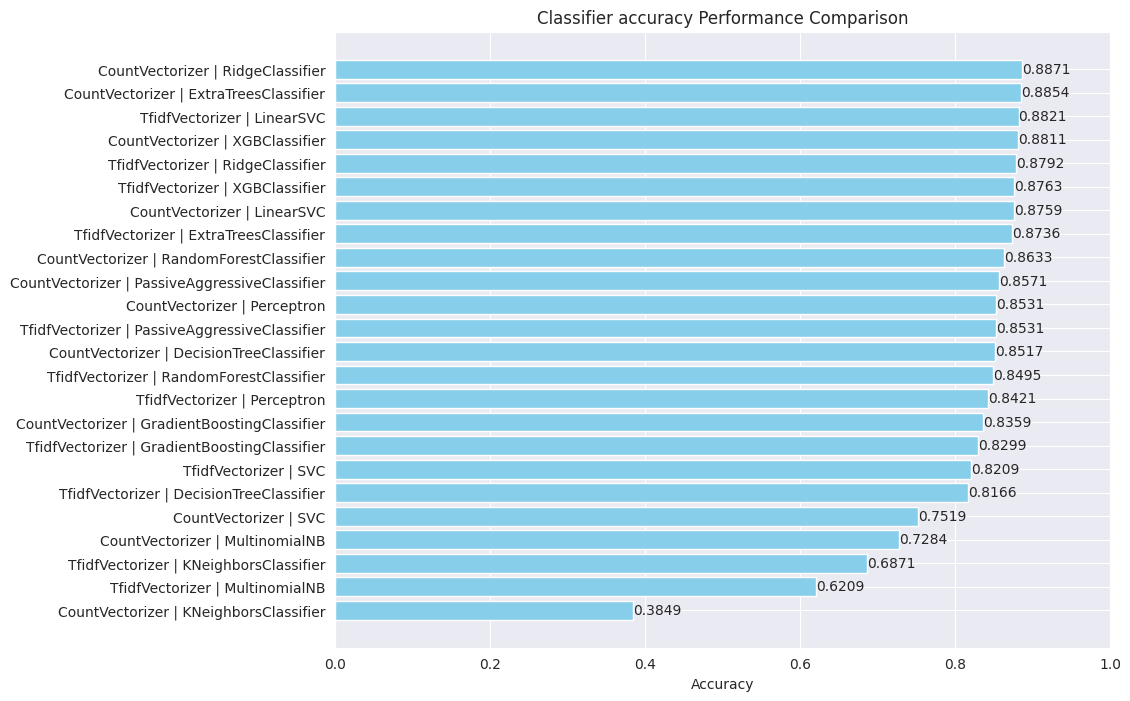

Pipeline 1: CountVectorizer | MultinomialNB, f1_weighted: 0.6887
Pipeline 2: TfidfVectorizer | MultinomialNB, f1_weighted: 0.5220
Pipeline 3: CountVectorizer | SVC, f1_weighted: 0.7329
Pipeline 4: TfidfVectorizer | SVC, f1_weighted: 0.8113
Pipeline 5: CountVectorizer | RandomForestClassifier, f1_weighted: 0.8608
Pipeline 6: TfidfVectorizer | RandomForestClassifier, f1_weighted: 0.8522
Pipeline 7: CountVectorizer | GradientBoostingClassifier, f1_weighted: 0.8373
Pipeline 8: TfidfVectorizer | GradientBoostingClassifier, f1_weighted: 0.8295
Pipeline 9: CountVectorizer | PassiveAggressiveClassifier, f1_weighted: 0.8589
Pipeline 10: TfidfVectorizer | PassiveAggressiveClassifier, f1_weighted: 0.8534
Pipeline 11: CountVectorizer | DecisionTreeClassifier, f1_weighted: 0.8535
Pipeline 12: TfidfVectorizer | DecisionTreeClassifier, f1_weighted: 0.8185
Pipeline 13: CountVectorizer | RidgeClassifier, f1_weighted: 0.8866
Pipeline 14: TfidfVectorizer | RidgeClassifier, f1_weighted: 0.8777
Pipeline 15

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline 21: CountVectorizer | LinearSVC, f1_weighted: 0.8755
Pipeline 22: TfidfVectorizer | LinearSVC, f1_weighted: 0.8808
Pipeline 23: CountVectorizer | Perceptron, f1_weighted: 0.8523
Pipeline 24: TfidfVectorizer | Perceptron, f1_weighted: 0.8422


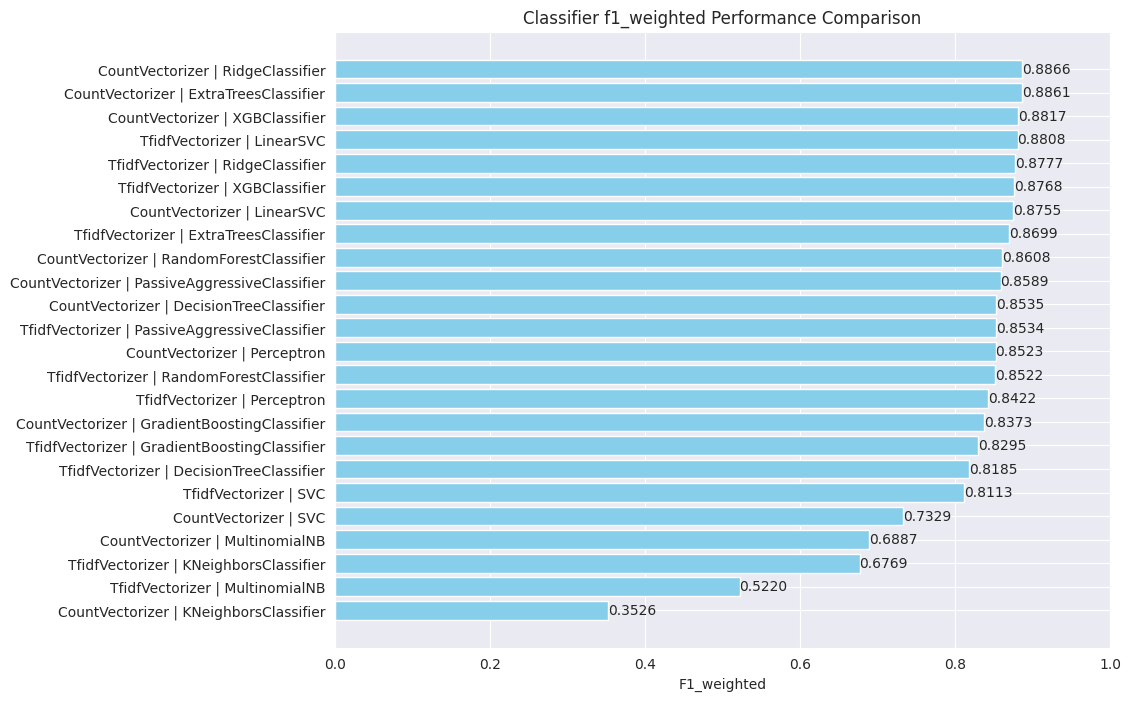

Pipeline 1: CountVectorizer | MultinomialNB, precision_weighted: 0.7678


/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Pipeline 2: TfidfVectorizer | MultinomialNB, precision_weighted: 0.7062
Pipeline 3: CountVectorizer | SVC, precision_weighted: 0.7897
Pipeline 4: TfidfVectorizer | SVC, precision_weighted: 0.8336
Pipeline 5: CountVectorizer | RandomForestClassifier, precision_weighted: 0.8637
Pipeline 6: TfidfVectorizer | RandomForestClassifier, precision_weighted: 0.8570
Pipeline 7: CountVectorizer | GradientBoostingClassifier, precision_weighted: 0.8512
Pipeline 8: TfidfVectorizer | GradientBoostingClassifier, precision_weighted: 0.8449
Pipeline 9: CountVectorizer | PassiveAggressiveClassifier, precision_weighted: 0.8580
Pipeline 10: TfidfVectorizer | PassiveAggressiveClassifier, precision_weighted: 0.8536
Pipeline 11: CountVectorizer | DecisionTreeClassifier, precision_weighted: 0.8523
Pipeline 12: TfidfVectorizer | DecisionTreeClassifier, precision_weighted: 0.8171
Pipeline 13: CountVectorizer | RidgeClassifier, precision_weighted: 0.8868
Pipeline 14: TfidfVectorizer | RidgeClassifier, precision_we

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline 21: CountVectorizer | LinearSVC, precision_weighted: 0.8755
Pipeline 22: TfidfVectorizer | LinearSVC, precision_weighted: 0.8813
Pipeline 23: CountVectorizer | Perceptron, precision_weighted: 0.8538
Pipeline 24: TfidfVectorizer | Perceptron, precision_weighted: 0.8431


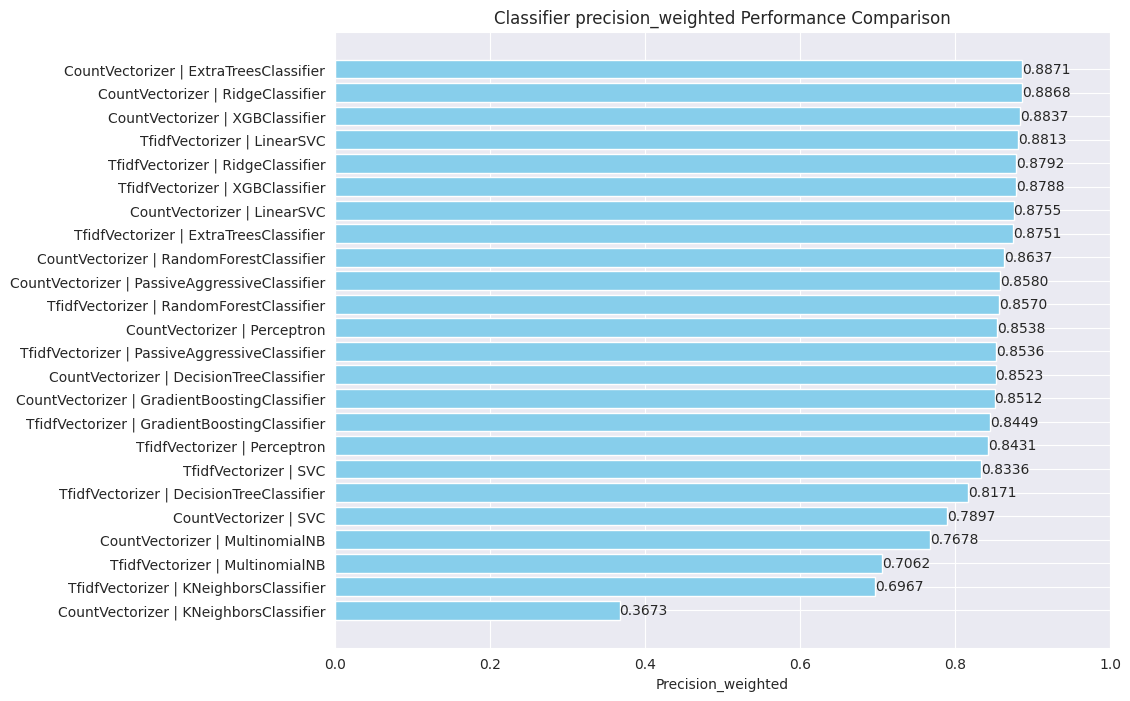

Pipeline 1: CountVectorizer | MultinomialNB, recall_weighted: 0.7284
Pipeline 2: TfidfVectorizer | MultinomialNB, recall_weighted: 0.6209
Pipeline 3: CountVectorizer | SVC, recall_weighted: 0.7519
Pipeline 4: TfidfVectorizer | SVC, recall_weighted: 0.8209
Pipeline 5: CountVectorizer | RandomForestClassifier, recall_weighted: 0.8642
Pipeline 6: TfidfVectorizer | RandomForestClassifier, recall_weighted: 0.8535
Pipeline 7: CountVectorizer | GradientBoostingClassifier, recall_weighted: 0.8374
Pipeline 8: TfidfVectorizer | GradientBoostingClassifier, recall_weighted: 0.8307
Pipeline 9: CountVectorizer | PassiveAggressiveClassifier, recall_weighted: 0.8597
Pipeline 10: TfidfVectorizer | PassiveAggressiveClassifier, recall_weighted: 0.8552
Pipeline 11: CountVectorizer | DecisionTreeClassifier, recall_weighted: 0.8510
Pipeline 12: TfidfVectorizer | DecisionTreeClassifier, recall_weighted: 0.8177
Pipeline 13: CountVectorizer | RidgeClassifier, recall_weighted: 0.8871
Pipeline 14: TfidfVectorize

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline 21: CountVectorizer | LinearSVC, recall_weighted: 0.8759
Pipeline 22: TfidfVectorizer | LinearSVC, recall_weighted: 0.8821
Pipeline 23: CountVectorizer | Perceptron, recall_weighted: 0.8531
Pipeline 24: TfidfVectorizer | Perceptron, recall_weighted: 0.8421


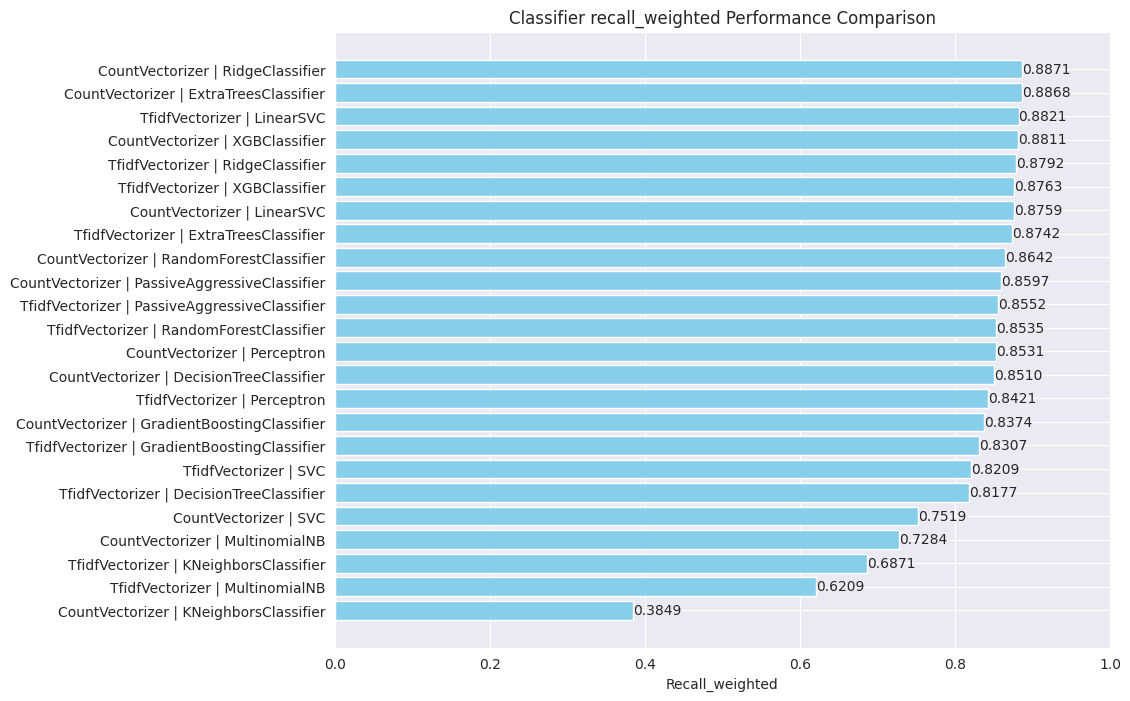

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn_pipe import compare_pipelines  # own file

# split the Data in more balanced Sets
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# convert Series to Numpy Array
X_train_mini = X_train_mini.to_numpy()
y_train_mini = y_train_mini.to_numpy()


metrics = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"]

for metric in metrics:
    compare_pipelines(
        X_train_mini,
        y_train_mini,
        cv=cv,
        metric=metric,
        plot_comparison=True,
        return_df=False,
    )

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline

# The best Pipeline overall Metrics is CountVectorizer + RidgeClassifer
best_pipe = Pipeline([("vect", CountVectorizer()), ("clf", RidgeClassifier())])
best_pipe.fit(X=X_train, y=y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', RidgeClassifier())])

In [8]:
y_pred = best_pipe.predict(X_test)
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 2])

In [9]:
from sklearn.metrics import accuracy_score

acc_score_baseline = accuracy_score(y_pred=y_pred, y_true=y_test) * 100
print(f"Accuracy: {acc_score_baseline:.3f}%")

Accuracy: 89.070%


1. Printing Classification Report
              precision    recall  f1-score   support

     sadness       0.93      0.94      0.94     29913
         joy       0.90      0.93      0.92     35433
        love       0.79      0.73      0.76      8638
       anger       0.91      0.88      0.90     14416
        fear       0.83      0.85      0.84     11947
    surprise       0.75      0.68      0.71      3856

    accuracy                           0.89    104203
   macro avg       0.85      0.84      0.84    104203
weighted avg       0.89      0.89      0.89    104203

2. Plot Confusion Matrix


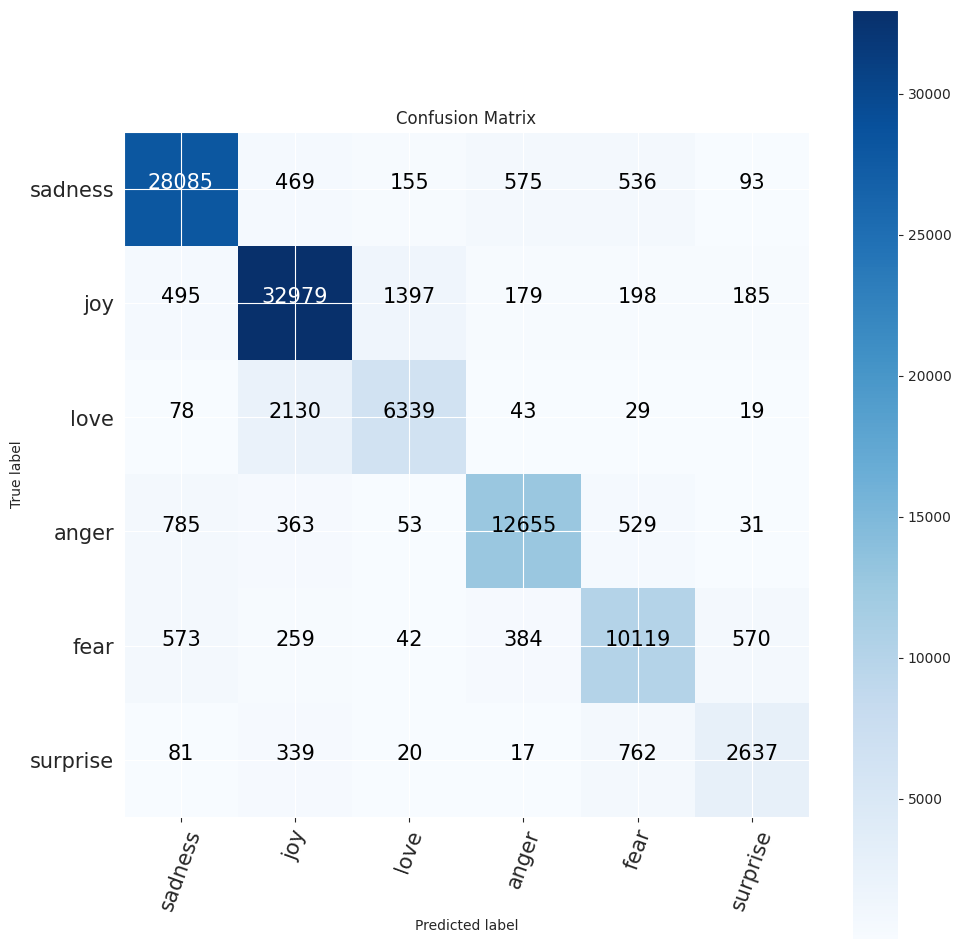

In [11]:
from evaluation_pipe import classification_evaluation_pipeline

# - sadness (0)
# - joy (1)
# - love (2)
# - anger (3)
# - fear (4)
# -  surprise (5).

classes = ["sadness", "joy", "love", "anger", "fear", "surprise"]

classification_evaluation_pipeline(
    X_test=X_test, y_pred=y_pred, y_true=y_test, classes=classes
)

In [17]:
# The Baseline has Problems with (joy, love) and (fear, surprise)

len(X_train), len(y_train), len(X_test), len(y_test)

(312606, 312606, 104203, 104203)

In [25]:
# convert to Numpy Array

X_train_mini = X_train[:25000].to_numpy()
y_train_mini = y_train[:25000].to_numpy()
X_test_mini = X_test[:25000].to_numpy()
y_test_mini = y_test[:25000].to_numpy()

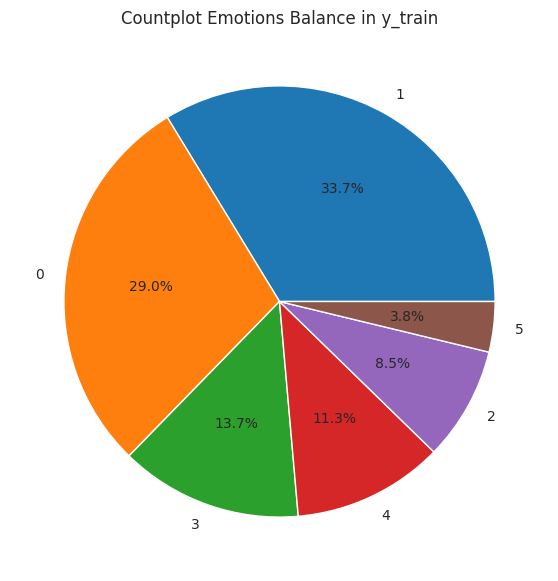

In [20]:
y_train_counts = y_train_mini.value_counts()

# Balance in Mini Training Label Set

plt.figure(figsize=(7, 7))
plt.pie(y_train_counts.values, labels=y_train_counts.index, autopct="%1.1f%%")
plt.title("Countplot Emotions Balance in y_train")
plt.show()

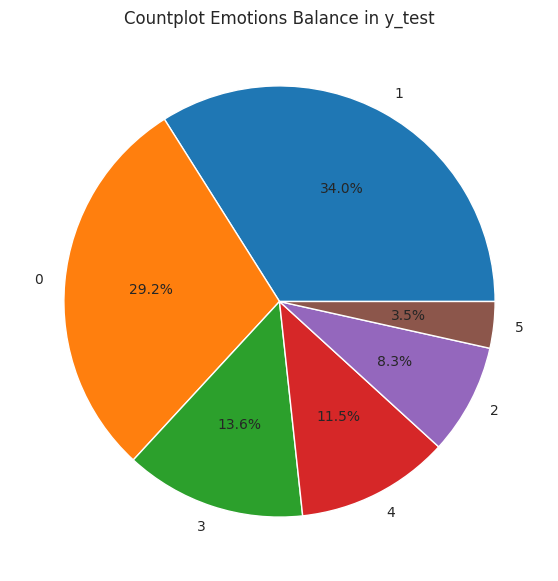

In [22]:
y_train_counts = y_test_mini.value_counts()

# Balance in Mini Test Label Set

plt.figure(figsize=(7, 7))
plt.pie(y_train_counts.values, labels=y_train_counts.index, autopct="%1.1f%%")
plt.title("Countplot Emotions Balance in y_test")
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

# define Cross Validation and the Pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([("vect", CountVectorizer()), ("clf", RidgeClassifier())])

In [27]:
# Param Grid for GridSearchCV

param_grid = {
    # vectorizer params
    "vect__max_df": [0.5, 0.75, 1.0],
    "vect__min_df": [1, 0.01, 0.05],
    "vect__max_features": [None, 5000, 10000],
    "vect__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "vect__stop_words": [None, "english"],
    # clf params
    "clf__alpha": [0.1, 1, 10, 100],
    "clf__class_weight": [None, "balanced"],
    "clf__max_iter": [None, 1000, 5000],
}

In [28]:
# tune Hyperparameters with f1_weighted (unbalanced Sets)

gs = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring="f1_weighted", n_jobs=-1)
gs.fit(X_train_mini, y_train_mini)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', RidgeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 1, 10, 100],
                         'clf__class_weight': [None, 'balanced'],
                         'clf__max_iter': [None, 1000, 5000],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__max_features': [None, 5000, 10000],
                         'vect__min_df': [1, 0.01, 0.05],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'vect__stop_words': [None, 'english']},
             scoring='f1_weighted')

In [30]:
print("Best Score Training Set: {}\n".format(gs.best_score_))
print("Accuracy on Test Set: {}\n".format(gs.score(X_test_mini, y_test_mini)))
print("Tuned Model Parameters: {}\n".format(gs.best_params_))

Best Score Training Set: 0.9116941010709112

Accuracy on Test Set: 0.9106317057860576

Tuned Model Parameters: {'clf__alpha': 10, 'clf__class_weight': 'balanced', 'clf__max_iter': None, 'vect__max_df': 0.75, 'vect__max_features': 10000, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__stop_words': 'english'}



In [ ]:
# Best Hyperparameters for f1_weighted metric

{
    "clf__alpha": 10,
    "clf__class_weight": "balanced",
    "clf__max_iter": None,
    "vect__max_df": 0.75,
    "vect__max_features": 10000,
    "vect__min_df": 1,
    "vect__ngram_range": (1, 2),
    "vect__stop_words": "english",
}

In [12]:
# tuned countvectorizer
count_vec = CountVectorizer(
    max_df=0.75, max_features=10000, min_df=1, ngram_range=(1, 2), stop_words="english"
)

# tuned ridgeclassifer
clf = RidgeClassifier(alpha=10, class_weight="balanced", max_iter=75)


tuned_pipe = Pipeline([("vect", count_vec), ("clf", clf)])
tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.75, max_features=10000,
                                 ngram_range=(1, 2), stop_words='english')),
                ('clf',
                 RidgeClassifier(alpha=10, class_weight='balanced',
                                 max_iter=75))])

In [13]:
# predict Test Set

y_pred = tuned_pipe.predict(X_test)

1. Printing Classification Report
              precision    recall  f1-score   support

     sadness       0.98      0.92      0.95     29913
         joy       0.97      0.90      0.93     35433
        love       0.75      0.99      0.85      8638
       anger       0.93      0.93      0.93     14416
        fear       0.89      0.88      0.88     11947
    surprise       0.70      0.99      0.82      3856

    accuracy                           0.92    104203
   macro avg       0.87      0.93      0.89    104203
weighted avg       0.93      0.92      0.92    104203

2. Plot Confusion Matrix


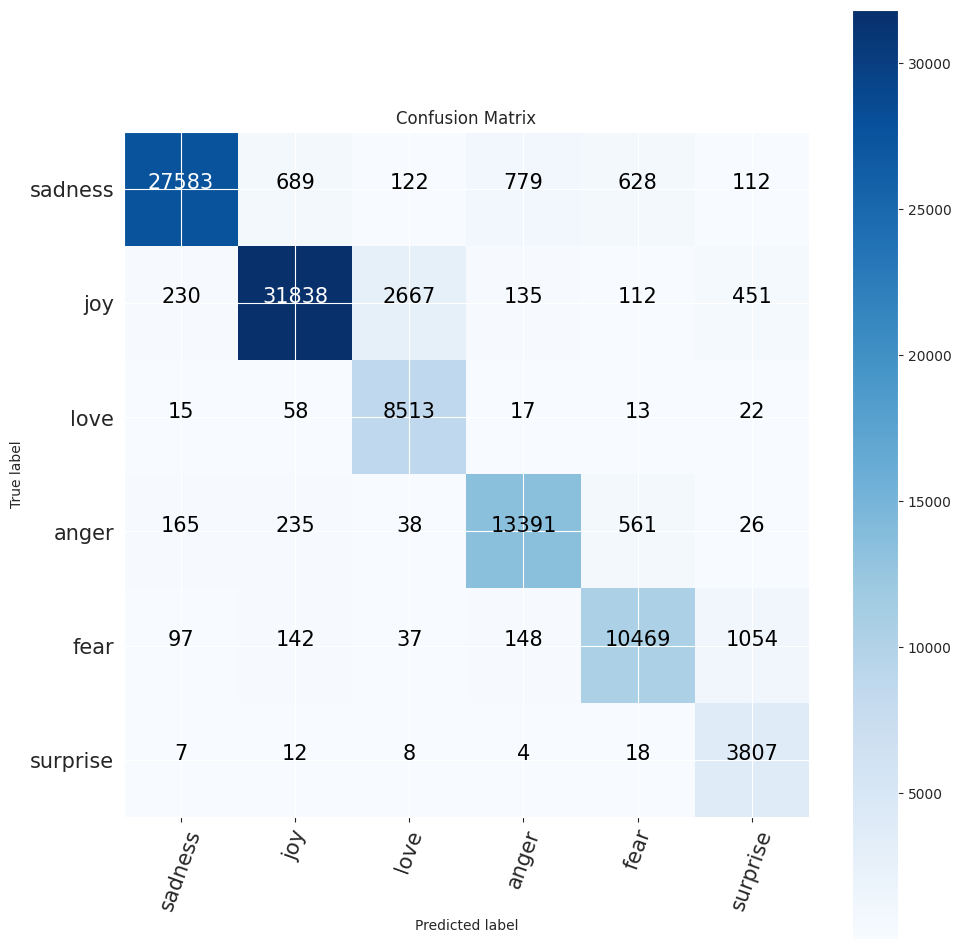

3. Getting wrong Predictions.


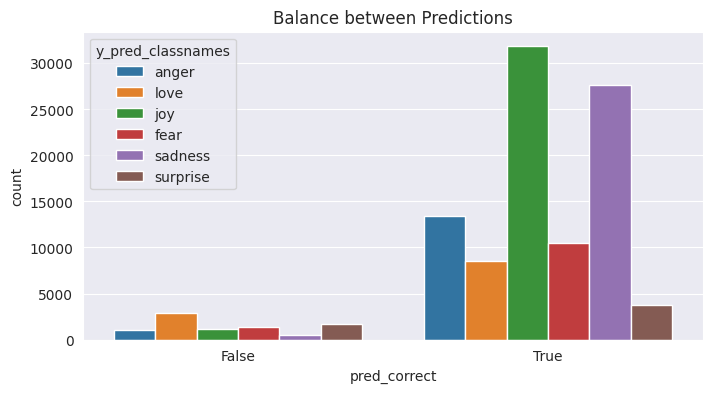

In [14]:
# Evaluate, is it better than Baseline?

df, wrong_preds = classification_evaluation_pipeline(
    X_test=X_test, y_pred=y_pred, y_true=y_test, classes=classes, get_wrong_preds=True
)

In [15]:
# For X_test, y_test Analysis

df.head()

,text,y_true,y_pred,y_true_classnames,y_pred_classnames,pred_correct
0,i do feel appreciative that i am able to raise...,1,1,joy,joy,True
1,i feel im ugly ugly ugly and ugly now,0,0,sadness,sadness,True
2,i feel like the popular one today,1,1,joy,joy,True
3,i feel even more so like i and the rest of the...,0,0,sadness,sadness,True
4,i am complaining because i feel extremely cont...,1,1,joy,joy,True


In [16]:
# Only the Wrong Predictions as DataFrame for more Analyis

wrong_preds.head()

,text,y_true,y_pred,y_true_classnames,y_pred_classnames,pred_correct
0,i am feeling anxious angry depressed hurt envi...,4,3,fear,anger,False
1,i have taken pity on all those liberals out th...,1,2,joy,love,False
2,i have a feeling that im not alone,0,1,sadness,joy,False
3,i am uncomfortable to enter into the realms of...,0,4,sadness,fear,False
4,ive absolutely no idea how to feel i feel hate...,0,3,sadness,anger,False


In [24]:
from sklearn.metrics import accuracy_score

# 2,6% more than Baseline!
acc_score = accuracy_score(y_pred=y_pred, y_true=y_test) * 100
print(f"Accuracy: {acc_score:.3f}%")

Accuracy: 91.654%


In [25]:
print(f"Baseline Accuracy: {acc_score_baseline:.3f}%")
print(f"Tuned Pipe Accuracy: {acc_score:.3f}%")

Baseline Accuracy: 89.074%
Tuned Pipe Accuracy: 91.654%
